# Introduction

This script will walk you through the process of fitting a linear model using polynomial basis functions, and the selection of a hyper-parameter using a validation data set.

# Data Generation

The following section of the code generates the training and testing sets using the simple model
$$ y = f(x) + \epsilon = 5x(x-0.5)(x-1) + \epsilon$$
where $\epsilon \sim N(0,0.2)$ is a Gaussian noise term with zero mean and standard deviation equal to 0.2.

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594 0.37079802 0.92676499
 0.64386512 0.82276161 0.4434142  0.22723872 0.55458479 0.06381726
 0.82763117 0.6316644  0.75808774 0.35452597 0.97069802 0.89312112
 0.7783835  0.19463871 0.466721   0.04380377 0.15428949 0.68304895
 0.74476216 0.96750973 0.32582536 0.37045971 0.46955581 0.18947136
 0.12992151 0.47570493 0.22690935 0.66981399 0.43715192 0.8326782
 0.7002651  0.31236664 0.8322598  0.80476436 0.38747838 0.2883281
 0.6824955  0.13975248 0.1999082  0.00736227 0.78692438 0.66485086
 0.70516538 0.78072903 0.45891578 0.5687412  0.139797   0.11453007
 0.66840296 0.47109621 0.56523611 0.76499886 0.63471832 0.5535794
 0.55920716 0.3039501  0.03081783 0.43671739 0.21458467 0.40852864
 0.85340307 0.23393949 0.05830274 0.28138389 0.29359376 0.66191651
 0.55703215 0.78389821]


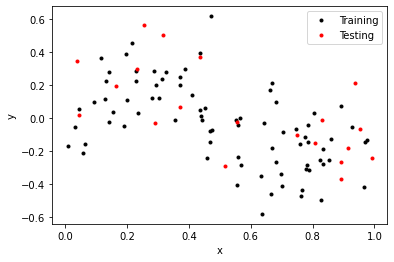

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Defining data generation model
def f(x):
    return 5*(x-0)*(x-0.5)*(x-1)

# Defining std of noise
stdNoise = 0.2;

# Setting a seed for random number generator
rng = np.random.default_rng(seed=42)
#print (rng)
# Generating training, validation and test data
N = 80
x_train = rng.random(N)
print(x_train)
y_train = f(x_train)+stdNoise*rng.normal(size=N)

N = 20
x_test = rng.random(N)
y_test = f(x_test)+stdNoise*rng.normal(size=N)

# Plotting data purely for verification
plt.plot(x_train,y_train,'k.',x_test,y_test,'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend({'Training','Testing'})
plt.show()

# Functions for Fitting a Polynomial to the Data

The functions below provide an implementation of a linear fitting of monomials to the data.

In [ ]:
# Function that creates the X matrix as defined for fitting our model
def create_X(x,deg):
    X = np.ones((len(x),deg+1))
    for i in range(1,deg+1):
        X[:,i] = x**i
    return X

# Function for predicting the response
def predict(x,beta):
    return np.dot(create_X(x,len(beta)-1),beta)

# Function for fitting the model
def fit(x,y,deg):
    return np.linalg.lstsq(create_X(x,deg),y,rcond=None)[0]

# Function for computing the MSE
def rmse(y,yPred):
    se = (y-yPred)**2
    return np.sqrt(np.mean(se))


# Hyper-Parameter Selection using Polynomial Fitting

This section illustrates how to perform hyper-parameter selection where the capacity of the model is captured by the degree of the polynomial used for fitting.

First, we fit the data to the entire training set and compute the corresponding training and test errors. We used all of the data since we are not performing any hyper-parameter selection at this point.

Training Error = 0.205
Test Error = 0.241


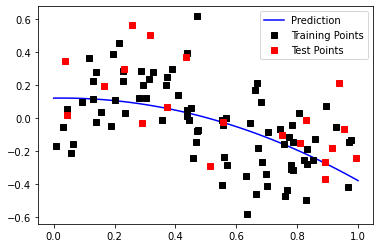

In [ ]:
# Fitting model
deg = 2
beta = fit(x_train,y_train,deg)

# Computing training error
y_train_pred = predict(x_train,beta)
err = rmse(y_train,y_train_pred)
print('Training Error = {:2.3}'.format(err))

# Computing test error
y_test_pred = predict(x_test,beta)
err = rmse(y_test,y_test_pred)
print('Test Error = {:2.3}'.format(err))

# Plotting fitted model
x = np.linspace(0,1,100)
y = predict(x,beta)
plt.plot(x,y,'b-',x_train,y_train,'ks',x_test,y_test,'rs')
plt.legend(['Prediction','Training Points','Test Points'])
plt.show()

## Question 1 [20 pts]

Your first tasks is to split the data into pre-val training and validation. You should use the last 30 samples for validation and the rest of the pre-validation training set. Keep all measurements in the same order as the original training set. Make sure the variables specified below are used for this purpose.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

x_preval, y_preval = [], []
x_val, y_val = [], []

# YOUR CODE HERE

x_preval, x_val, y_preval, y_val = train_test_split(x_train, y_train,train_size=0.625, test_size=0.375,random_state = False, shuffle = False ,stratify = None)
print(x_preval)
print(x_val)
print(y_preval)
print(y_val)

#raise NotImplementedError()

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594 0.37079802 0.92676499
 0.64386512 0.82276161 0.4434142  0.22723872 0.55458479 0.06381726
 0.82763117 0.6316644  0.75808774 0.35452597 0.97069802 0.89312112
 0.7783835  0.19463871 0.466721   0.04380377 0.15428949 0.68304895
 0.74476216 0.96750973 0.32582536 0.37045971 0.46955581 0.18947136
 0.12992151 0.47570493 0.22690935 0.66981399 0.43715192 0.8326782
 0.7002651  0.31236664 0.8322598  0.80476436 0.38747838 0.2883281
 0.6824955  0.13975248]
[0.1999082  0.00736227 0.78692438 0.66485086 0.70516538 0.78072903
 0.45891578 0.5687412  0.139797   0.11453007 0.66840296 0.47109621
 0.56523611 0.76499886 0.63471832 0.5535794  0.55920716 0.3039501
 0.03081783 0.43671739 0.21458467 0.40852864 0.85340307 0.23393949
 0.05830274 0.28138389 0.29359376 0.66191651 0.55703215 0.78389821]
[-0.11452235  0.01339094 -0.12632739 -0.34065372  0.10048877 -0.13290711
 -0.47655183 -0.14313869  0.113819

In [ ]:
"""Check that the dimensions are correct and the correct data is included in each variable"""
assert len(x_val)==30
assert len(y_val)==30
assert len(x_preval)==len(x_train)-30
assert len(y_preval)==len(y_train)-30
assert x_val[-1]==x_train[-1]
assert y_val[-1]==y_train[-1]
assert x_preval[0]==x_train[0]
assert y_preval[0]==y_train[0]

## Question 2 [40 pts]

Next, compute training and validation errors for each of the listed degrees. The training error should show a decreasing pattern. The validation error should decrease and then increase.

Training Error = 0.229
Test Error = 0.273
Training Error = 0.182
Test Error = 0.246
Training Error = 0.182
Test Error = 0.242
Training Error = 0.159
Test Error = 0.216
Training Error = 0.155
Test Error = 0.22
Training Error = 0.149
Test Error = 0.225
Training Error = 0.148
Test Error = 0.234
Training Error = 0.147
Test Error = 0.242
Training Error = 0.145
Test Error = 0.234
Training Error = 0.144
Test Error = 0.244
Training Error = 0.141
Test Error = 0.381


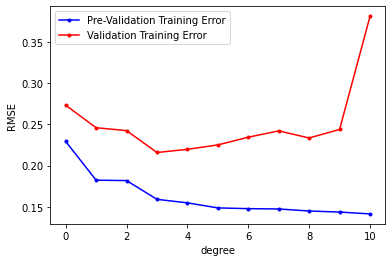

In [ ]:
# List of degrees considered for the analysis
degList =  [0,1,2,3,4,5,6,7,8,9,10]

# Initializing range of degree values to be tested and errors
errTrain = np.zeros(len(degList))
errVal = np.zeros(len(degList))

# Computing training and validation RMSE errors for each degree value

# YOUR CODE HERE
lst1 = []
lst2 = []
for z in degList:
  beta = fit(x_preval,y_preval,z)

  # Computing training error
  y_train_pred = predict(x_preval,beta)
  err = rmse(y_preval,y_train_pred)
  print('Training Error = {:2.3}'.format(err))
  lst1.append(err)

  # Computing test error
  y_test_pred = predict(x_val,beta)
  err = rmse(y_val,y_test_pred)
  print('Test Error = {:2.3}'.format(err))
  lst2.append(err)

#raise NotImplementedError()

# Plotting results
plt.plot(degList,lst1,'b.-',degList,lst2,'r.-')
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.legend(['Pre-Validation Training Error','Validation Training Error'])
plt.show()

In [ ]:
"""Check that the correct trends and the correct values are present"""
assert -np.max(np.diff(lst1))>0 ### Checking for monotonicity of training error
assert -np.min(np.diff(lst2))>0 ### Checking for some decreasing trend in the validation error
assert np.max(np.diff(lst2))>0 ### Checking for some increasing tred in the validation error
assert np.abs(min(lst1)-0.14)<1e-2 ### Checking the minimum of the training error
assert np.abs(min(lst2)-0.22)<1e-2 ### Checking the minimum of the testing error


# Performance of Optimal Model

We demonstrate the performance of the model by comparing the error when training with only the pre-validation training data, and with the training and validation data after the hyper-parameter has already been selected.

## Question 3 [20 pts]

Complete the code to compute the desired test errors for the models trained using the pre-validation training set and the full training set.

Optimal Degree = 3
3
Training Error = 0.141
Test Error = 0.381
Training Error = 0.259
Test Error = 0.199


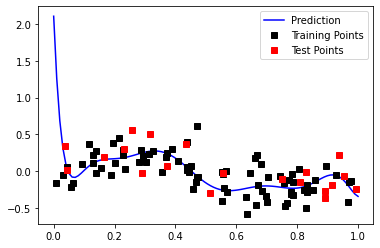

In [ ]:
# Selecting optimal degree
degOpt = degList[np.argmin(lst2)]
print('Optimal Degree = {:1}'.format(degOpt))
print (degOpt)
# Initializing variable for the error using only the pre-validation training set
errTest_PreVal = []

# Initializing variable for the error using only the full training set
errTest_FullTrain = []

# YOUR CODE HERE

beta1 = fit(x_preval,y_preval,degOpt)

# Computing training error
y_train_pred = predict(x_preval,beta)
err = rmse(y_preval,y_train_pred)
print('Training Error = {:2.3}'.format(err))

# Computing test error
y_test_pred = predict(x_val,beta)
err = rmse(y_val,y_test_pred)
print('Test Error = {:2.3}'.format(err))
errTest_PreVal.append(err)
#computing error using only fully training data

beta2 = fit(x_train,y_train,degOpt)
# Computing training error
y_train_pred = predict(x_train,beta)
err = rmse(y_train,y_train_pred)
print('Training Error = {:2.3}'.format(err))

# Computing test error
y_test_pred = predict(x_test,beta)
err = rmse(y_test,y_test_pred)
print('Test Error = {:2.3}'.format(err))
errTest_FullTrain.append(err)



# Printing results
#print('Test Error [Preval Dataset Only] = {:2.3}'.format(errTest_PreVal))
#print('Test Error [Full Training Dataset] = {:2.3}'.format(errTest_FullTrain))

# Plotting fitted model
x = np.linspace(0,1,100)
y = predict(x,beta) # Use the beta from the full training set for better visualization
plt.plot(x,y,'b-',x_train,y_train,'ks',x_test,y_test,'rs')
plt.legend(['Prediction','Training Points','Test Points'])
plt.show()

In [ ]:
"""Check that the correct values are present"""
assert errTest_PreVal>errTest_FullTrain # The full-training set error should be lower


## Question 4 [15 pts]

Is this performance using the full training set better than what it was observed when training the model only with the pre-val training set? Why is that the case? Please enter your response below.

In [ ]:
It can be inferred from the above results that in this particular case the performance of the model with full-training set was better than the one with pre-val training set since the amount of data used for full training is considerably more than just preval training.

## Question 5 [5 pts]

Do you always expect this to be the case? Please enter your response below.

The performance of a model is affected by the features present in input parameters and the hyperparameters assumed in the model. So, it is impossible to conclude, as it varies from model to model.